# Algorytm najszybszego spadku dla regresji wielomianowej

Algorytm przyjmuje zbiór danych - x oraz y i próbuje wyzaczyć funkcję wilomianową, która najlepiej przewiduje wartości y na podstawie x. Wynikiem jest wyznaczenie współczynników wielomianu.

### Importy

In [55]:
from matplotlib import pyplot as plt
import numpy as np
import random

### Początkowe współczynniki
Tworzymy losowe początkowe współczynniki wielomianu - od nich algorytm rozpocznie dopasowanie. Oraz oryginalne współczynniki na podstawie których zostanie wyznaczony zbiór danych. Aby zmienić generowany zbiór danych należy zmienić tablicę coeffs.

In [56]:
rand_coeffs = (random.randrange(-10, 10), random.randrange(-10, 10), random.randrange(-10,10))
coeffs = []
#coeffs = [2, -5, 4] # a, b, c
#coeffs = [17, -8, 4] # a, b, c

k = int(input("Podaj stopień wielomianu: "))
print('Stopień: {}'.format(k))

for i in range(k+1):
    a = int(input('Podaj {} współczynnik wielomianu: '.format(i+1)))
    coeffs.append(a)

print(coeffs)

Stopień: 2
[1, 2, 3]


### Wyznaczenie wartości wielomianu
Funkcja na podstawie współczynników oraz x wyznacza wartość y wielomianu.

In [57]:
def eval_2nd_degree(coeffs, x, k):
    y = 0

    for i in range(len(coeffs)):
        a = coeffs[i]*x**(k-i)
        y += a
    return y

#eval_2nd_degree(coeffs, 2, k)
    

### Wartości wielomianu z szumem
Funkcja jest analogiczna do poprzedniej - wyznacza wartość wielomianu na podstawie wpółczynników oraz x, ale dodatkowo dodaje szum do wyjściowych wartości - funkcja zostanie użyta przy generowaniu danych.

In [58]:
def eval_2nd_degree_jitter(coeffs, x, j):
    y = eval_2nd_degree(coeffs, x, k)
    
    interval_min = y-j
    interval_max = y+j
    
    return random.uniform(interval_min, interval_max)

### Wygenerowanie danych
Kod generuje zbiór danych. Na podstawie wartości x od -10 do 10 i losowych współczynników wielomianu generuje wartości y z szumem. Parametr j określa jak moco dane będą zaszumione

[-3.97652539  5.12289902  0.81603889 -4.21468549  7.29999822  6.80214713
  5.12999406 -2.53404436 -5.49920761  8.378254   -7.46372758  9.86734656
  4.8149328   6.19203961 -6.38598843  6.71630077  1.01277528  9.94551208
  0.43640911  0.97816101 -1.16523849  2.44180092 -8.97602849  2.82340563
 -7.02243684 -6.05657589 -6.7288575   1.22080707  8.1319712  -9.53796227
 -2.7554347  -6.77738836  2.37331025 -6.13297674  9.17486304  2.5028872
  6.24318809  0.77218811 -9.98325959 -5.63262972  6.25902107  5.51014874
  6.1640148   4.72398673 -4.78847828  8.68457944 -9.88763602  6.27522868
 -3.68361737  0.38206885  5.92106547  1.95099718  2.29306717  7.99642986
 -1.45767721 -3.62004766 -9.65908783  2.18931831 -6.10757568  5.65887017
 -3.93428386 -5.92527032 -5.28481895  1.2284518  -0.25110658 -5.26058855
 -7.89031713  6.18149346  5.79201652 -8.15007796  0.68707937  5.4565716
  9.46307956  9.90004237 -9.24364221  4.70422637 -4.13537182  2.25176354
  4.15610024 -0.3163456   1.17286334 -2.64623937 -9.9

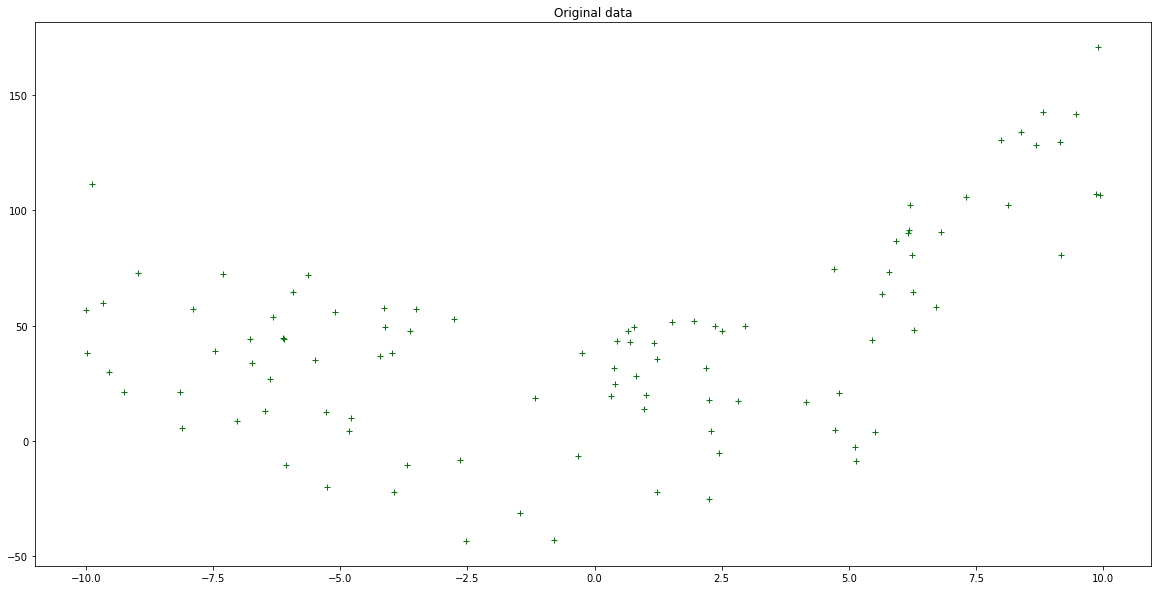

In [59]:
hundred_xs=np.random.uniform(-10,10,100)
print(hundred_xs)

j=50
x_y_pairs = []
for x in hundred_xs:
    y  = eval_2nd_degree_jitter(coeffs, x, j)
    x_y_pairs.append((x,y))
    
xs = []
ys = []
for a,b in x_y_pairs:
    xs.append(a)
    ys.append(b)
    
plt.figure(figsize=(20,10))
plt.plot(xs, ys, 'g+')
plt.title('Original data')
plt.show()

### Funkcja straty
Do określenia jak mocno przewidziane wartości y są różne zostanie użyta kwadratowa funkcja straty.

In [60]:
def loss_mse(ys, y_bar):
    return sum((ys - y_bar)*(ys - y_bar)) / len(ys)

### Gradient
Funkcja przyjmuje współczynniki wielomianu, x, y oraz parametr prękości uczenia i wylicza za pomocą gradientu nowe wartości współczynników wielomianu.

In [62]:
def calc_gradient_2nd_poly_for_GD(coeffs, inputs_x, outputs_y, lr, k): 
    a_s = []
    b_s = []
    c_s = []
        
    y_bars = eval_2nd_degree(coeffs, inputs_x, k)


    # tu zamiast 2 dodałem k i w potencial_b k-1, czy tylko to powinno byś zmiaenione?
    for x,y,y_bar in list(zip(inputs_x, outputs_y, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)
        x_squared = x**k      
        partial_a = x_squared * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x**(k-1) * (y-y_bar)
        b_s.append(partial_b)
        partial_c = (y-y_bar)
        c_s.append(partial_c)
    
    num = [i for i in y_bars]
    n = len(num)
    
    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)


    a_new = coeffs[0] - lr * gradient_a
    b_new = coeffs[1] - lr * gradient_b
    c_new = coeffs[2] - lr * gradient_c
    
    new_model_coeffs = (a_new, b_new, c_new)
    
    #update with these new coeffs:
    new_y_bar = eval_2nd_degree(new_model_coeffs, inputs_x, k)
    
    updated_model_loss = loss_mse(outputs_y, new_y_bar)
    return updated_model_loss, new_model_coeffs, new_y_bar

### Minimalizacja
Funkcja powtarza proces wyznaczenia nowych współczynników wielomianu zadaną ilość razy - epoch.

In [63]:
def gradient_descent(epochs, lr):
    losses = []
    rand_coeffs_to_test = rand_coeffs
    for i in range(epochs):
        loss = calc_gradient_2nd_poly_for_GD(rand_coeffs_to_test, hundred_xs, ys, lr, k)
        rand_coeffs_to_test = loss[1]
        losses.append(loss[0])
    #print(losses)
    return loss[0], loss[1], loss[2], losses  #(updated_model_loss, new_model_coeffs, new_y_bar, saved loss updates)

### Uruchomienie
Wartości wyznaczonego wielomionu zostają wyświetlone na wykresie z porównaniem do zbioru danych.

In [64]:
GD = gradient_descent(1500, 0.0001)

plt.figure(figsize=(20,10))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, GD[2], 'b.', label = 'final_prediction')
plt.title('Original vs Final prediction after Gradient Descent')
plt.legend(loc="lower right")
plt.show()

TypeError: 'list' object is not callable

### Wyznaczone współczynniki wielomianu

In [ ]:
print("Początkowe współczynniki {}".format(rand_coeffs))
print("Wyznaczone współczynniki {}".format(GD[1]))
print("Oryginalne współczynniki {}".format(coeffs))

Początkowe współczynniki (7, 5, -6)
Wyznaczone współczynniki (2.1546532016162714, -4.490001059494276, -5.122120484596819)
Oryginalne współczynniki [2, -5, 4]


### Funkcja straty
Wykres przedstawia jak zmianiała się wartość funkcji straty w kolejnych krokach algorytmu.

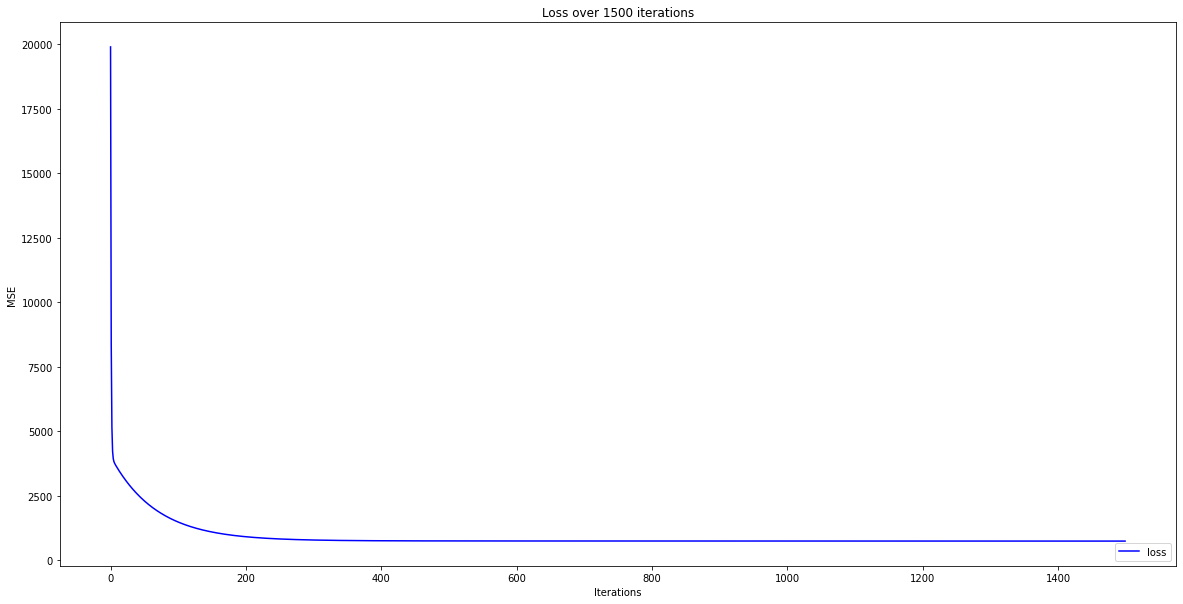

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(GD[3], 'b-', label = 'loss')
plt.title('Loss over 1500 iterations')
plt.legend(loc="lower right")
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()